In [22]:
import os
import numpy as np
import pandas as pd
import struct
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

#### Functions to load Training Data and Testing Data

In [23]:
def load_training_data():
    f_image = open('../data/train-images-idx3-ubyte', 'rb')
    f_label = open('../data/train-labels-idx1-ubyte', 'rb')
    
    magic_number, size, row, column = struct.unpack(">IIII", f_image.read(16))
    image_data = np.fromfile(f_image, dtype=np.uint8)
    print("Training Image Data:")
    print(magic_number, size, row, column)
    print(image_data.shape, '\n')
    
    magic_number, size = struct.unpack(">II", f_label.read(8))    
    image_label = np.fromfile(f_label, dtype=np.uint8)
    print("Training Image Label:")
    print(magic_number, size)
    print(image_label.shape, '\n')
    
    image_data = np.array(image_data).reshape((size, row, column))
    return image_data, image_label


def load_testing_data():
    f_image = open('../data/t10k-images-idx3-ubyte', 'rb')
    f_label = open('../data/t10k-labels-idx1-ubyte', 'rb')
    
    magic_number, size, row, column = struct.unpack(">IIII", f_image.read(16))
    image_data = np.fromfile(f_image, dtype=np.uint8)
    print("Testing Image Data:")
    print(magic_number, size, row, column)
    print(image_data.shape, '\n')
    
    magic_number, size = struct.unpack(">II", f_label.read(8))    
    image_label = np.fromfile(f_label, dtype=np.uint8)
    print("Testing Image Label:")
    print(magic_number, size)
    print(image_label.shape, '\n')
    
    image_data = np.array(image_data).reshape((size, row, column))
    return image_data, image_label

#### Loading Training and Testing Data

In [24]:
train_image_data, train_image_label = load_training_data()
test_image_data, test_image_label = load_testing_data()

Training Image Data:
2051 60000 28 28
(47040000,) 

Training Image Label:
2049 60000
(60000,) 

Testing Image Data:
2051 10000 28 28
(7840000,) 

Testing Image Label:
2049 10000
(10000,) 



9


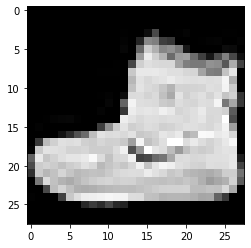

In [25]:
plt.imshow(train_image_data[0], cmap='gray');
print(train_image_label[0])

7


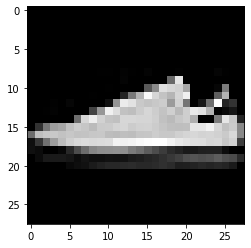

In [26]:
plt.imshow(train_image_data[6], cmap='gray');
print(train_image_label[6])

0


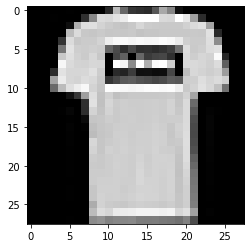

In [27]:
plt.imshow(train_image_data[1], cmap='gray');
print(train_image_label[1])

0


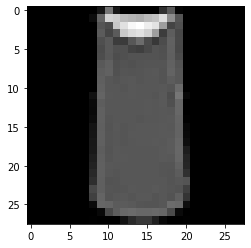

In [28]:
plt.imshow(train_image_data[2], cmap='gray');
print(train_image_label[2])

# Q3 (Section-C)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [30]:
train_image, valid_image, train_label, valid_label = train_test_split(train_image_data, train_image_label, test_size=0.15) 

In [31]:
print(train_image.shape)
print(valid_image.shape)
print(train_label.shape)
print(valid_label.shape)

(51000, 28, 28)
(9000, 28, 28)
(51000,)
(9000,)


In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation='logistic', batch_size=128, max_iter=1)

nsamples, nrows, ncols = train_image.shape
mlp.fit(train_image.reshape((nsamples, nrows*ncols)), train_label)

print("Accuracy on Training Set: ", end=' ')
nsamples, nrows, ncols = train_image.shape
print(mlp.score(train_image.reshape((nsamples, nrows*ncols)), train_label))

print("Accuracy on Validation Set: ", end=' ')
nsamples, nrows, ncols = valid_image.shape
print(mlp.score(valid_image.reshape((nsamples, nrows*ncols)), valid_label))

print("Accuracy on Testing Set: ", end=' ')
nsamples, nrows, ncols = test_image_data.shape
print(mlp.score(test_image_data.reshape((nsamples, nrows*ncols)), test_image_label))

Accuracy on Training Set:  0.7224117647058823
Accuracy on Validation Set:  0.7276666666666667
Accuracy on Testing Set:  0.7182


#### All the output label classes

In [33]:
pd.Series(train_image_label).unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [34]:
def cross_entropy_loss(trained_mlp:MLPClassifier, x: pd.DataFrame, y: np.ndarray, thresh):
        '''
        Calculate the Cross Entropy loss on the given Dataset.
        '''
        nsamples, nrows, ncols = x.shape
        x = x.reshape((nsamples, nrows*ncols))
        y = np.eye(10)[y]
        y_pred_proba = trained_mlp.predict_proba(x)
        cross_entrpy_loss = y * np.log2(thresh + y_pred_proba)
        return -np.sum(cross_entrpy_loss) / nsamples

In [35]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

## Part (a)

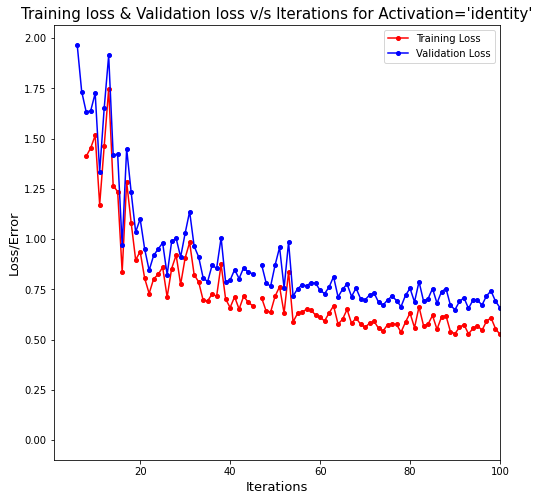

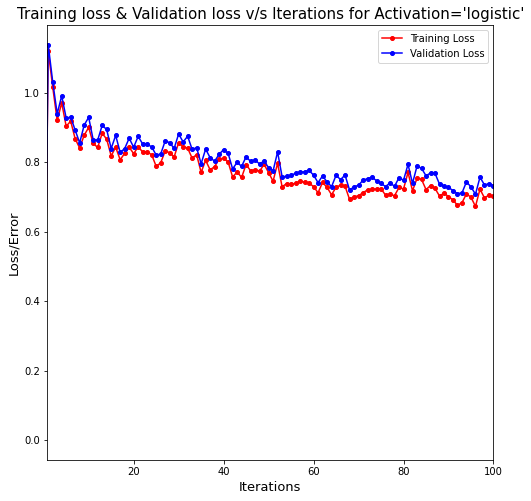

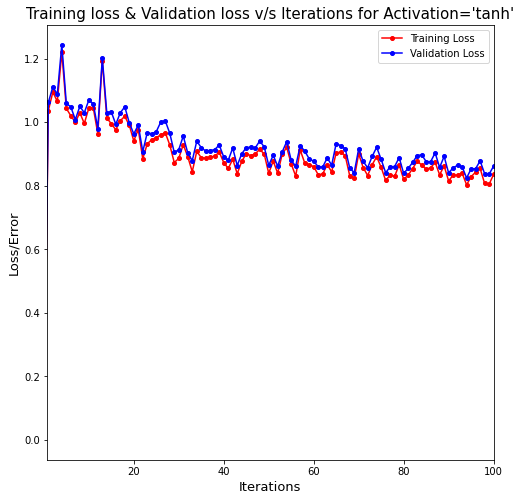

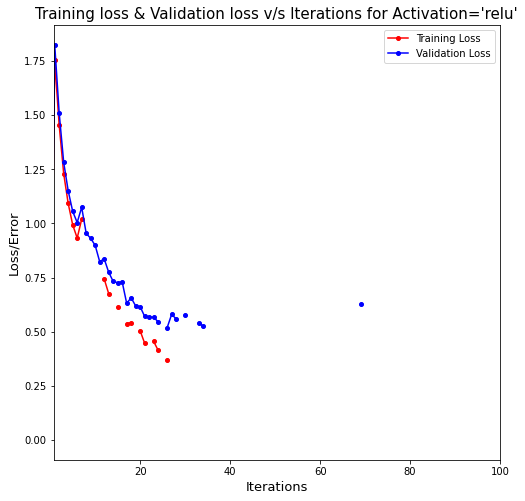

In [ ]:
def MLP_activations(activation:str, epochs, batch_size, x_train, y_train, x_valid, y_valid):
    train_loss, validation_loss = [0], [0]
    thresh = 0.001 if activation=='relu' else 0

    mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation=activation, batch_size=batch_size)
    
    for epoch in range(epochs):
        nsamples, nrows, ncols = x_train.shape
        mlp.partial_fit(x_train.reshape((nsamples, nrows*ncols)), y_train, classes=np.arange(10))
        
        train_loss.append(cross_entropy_loss(trained_mlp=mlp, x=x_train, y=y_train, thresh=thresh))
        validation_loss.append(cross_entropy_loss(trained_mlp=mlp, x=x_valid, y=y_valid, thresh=thresh))
    
    plt.figure(figsize=(8,8))
    plt.plot(train_loss, 'r-o', label='Training Loss', ms=4)
    plt.plot(validation_loss, 'b-o', label='Validation Loss', ms=4)
    plt.xlabel('Iterations',fontsize=13)
    plt.ylabel('Loss/Error',fontsize=13)
    plt.xlim((0.75,epochs))
    plt.title(f"Training loss & Validation loss v/s Iterations for Activation='{activation}'",fontsize=15)
    plt.legend()
    plt.show()
    return mlp

epochs = 100
batch_size = 128
models_activation = []

for activations in ['identity', 'logistic', 'tanh', 'relu']:
    mlp = MLP_activations(activations, epochs, batch_size, train_image, train_label, valid_image, valid_label)
    models_activation.append(mlp)

In [ ]:
activations = ['identity', 'logistic', 'tanh', 'relu']

for i in range(len(activations)):
    print(f"==> Accuracy on activation fucntion = '{activations[i]}'")
    nsamples, nrows, ncols = train_image.shape
    print(f"Training Accuracy :", models_activation[i].score(train_image.reshape((nsamples, nrows*ncols)),
                                                                train_label))
    nsamples, nrows, ncols = valid_image.shape
    print(f"Validation Accuracy :", models_activation[i].score(valid_image.reshape((nsamples, nrows*ncols)), 
                                                                valid_label))
    print()

==> Accuracy on activation fucntion = 'identity'
Training Accuracy : 0.8715294117647059
Validation Accuracy : 0.8468888888888889

==> Accuracy on activation fucntion = 'logistic'
Training Accuracy : 0.8233725490196079
Validation Accuracy : 0.8136666666666666

==> Accuracy on activation fucntion = 'tanh'
Training Accuracy : 0.7835098039215687
Validation Accuracy : 0.7775555555555556

==> Accuracy on activation fucntion = 'relu'
Training Accuracy : 0.9604117647058823
Validation Accuracy : 0.8824444444444445



In [ ]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

## Part (b)

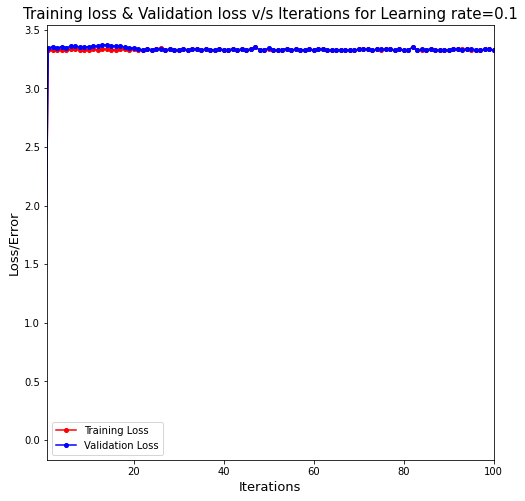

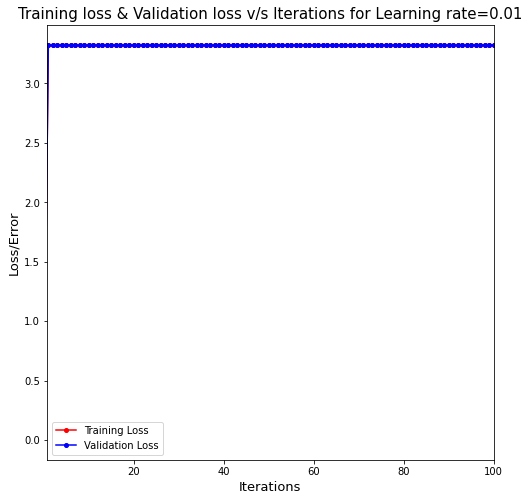

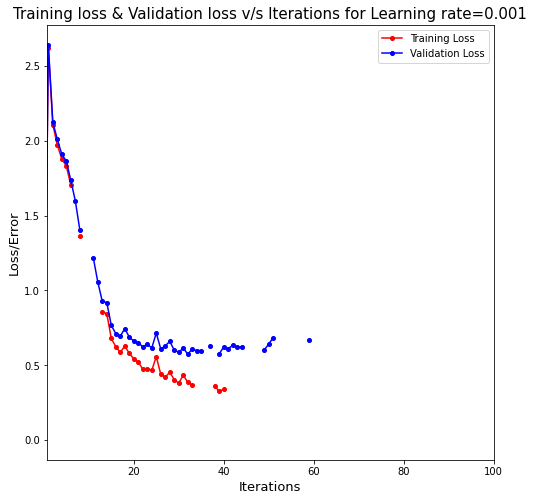

In [ ]:
def MLP_learning_rate(lr:int, epochs, batch_size, x_train, y_train, x_valid, y_valid):
    train_loss, validation_loss = [0], [0]
    
    mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation='relu', learning_rate_init=lr,
                        batch_size=batch_size)
    
    for epoch in range(epochs):
        nsamples, nrows, ncols = x_train.shape
        mlp.partial_fit(x_train.reshape((nsamples, nrows*ncols)), y_train, classes=np.arange(10))
            
        train_loss.append(cross_entropy_loss(trained_mlp=mlp, x=x_train, y=y_train, thresh=0.001))
        validation_loss.append(cross_entropy_loss(trained_mlp=mlp, x=x_valid, y=y_valid, thresh=0.001))

    plt.figure(figsize=(8,8))
    plt.plot(train_loss, 'r-o', label='Training Loss', ms=4)
    plt.plot(validation_loss, 'b-o', label='Validation Loss', ms=4)
    plt.xlabel('Iterations', fontsize=13)
    plt.ylabel('Loss/Error', fontsize=13)
    plt.xlim((0.75,epochs))
    plt.title(f"Training loss & Validation loss v/s Iterations for Learning rate={lr}", fontsize=15)
    plt.legend()
    plt.show()
    return mlp

epochs = 100
batch_size = 128
models_lr = []

for lr in [0.1, 0.01, 0.001]:
    mlp = MLP_learning_rate(lr, epochs, batch_size, train_image, train_label, valid_image, valid_label)
    models_lr.append(mlp)

In [ ]:
lr = [0.1, 0.01, 0.001]

for i in range(len(lr)):
    print(f"==> Accuracy with Learning Rate='{lr[i]}'")
    nsamples, nrows, ncols = train_image.shape
    print(f"Training Accuracy:", models_lr[i].score(train_image.reshape((nsamples, nrows*ncols)), 
                                                    train_label))
    nsamples, nrows, ncols = valid_image.shape
    print(f"Validation Accuracy:", models_lr[i].score(valid_image.reshape((nsamples, nrows*ncols)), 
                                                    valid_label))
    print()

==> Accuracy with Learning Rate='0.1'
Training Accuracy : 0.10013725490196078
Validation Accuracy : 0.09922222222222223

==> Accuracy with Learning Rate='0.01'
Training Accuracy : 0.0997843137254902
Validation Accuracy : 0.10122222222222223

==> Accuracy with Learning Rate='0.001'
Training Accuracy : 0.945843137254902
Validation Accuracy : 0.8777777777777778



In [ ]:
.

## Part (c)

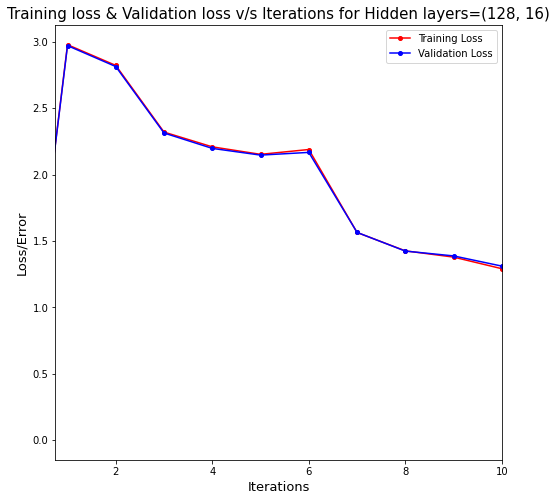

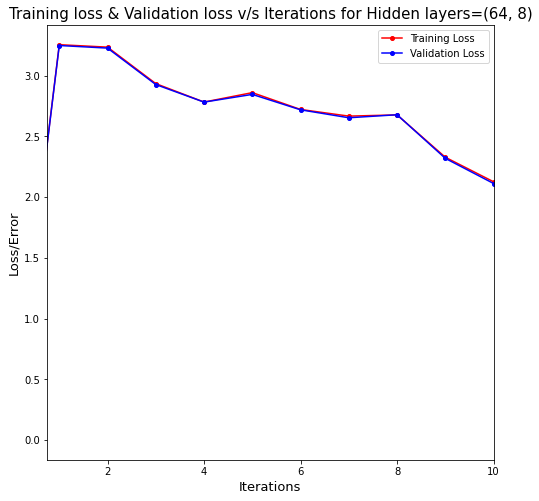

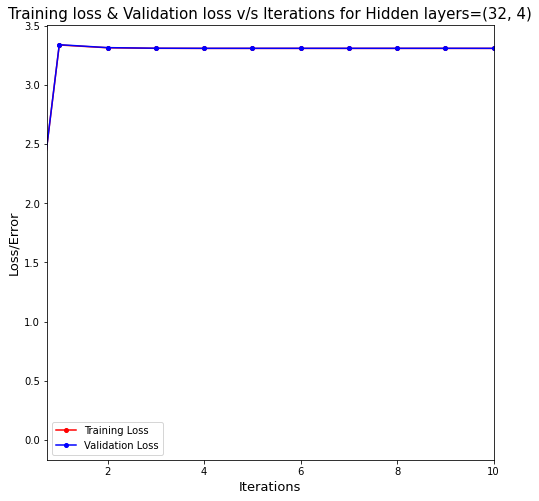

In [39]:
def MLP_hidden_layers(hidden_layer, epochs, batch_size, x_train, y_train, x_valid, y_valid):
    train_loss, validation_loss = [0], [0]
    
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, activation='relu', learning_rate_init=0.001,
                        batch_size=batch_size)

    for epoch in range(epochs):    
        nsamples, nrows, ncols = x_train.shape
        mlp.partial_fit(x_train.reshape((nsamples, nrows*ncols)), y_train, classes=np.arange(10))

        train_loss.append(cross_entropy_loss(trained_mlp=mlp, x=x_train, y=y_train, thresh=0.001))
        validation_loss.append(cross_entropy_loss(trained_mlp=mlp, x=x_valid, y=y_valid, thresh=0.001))

    plt.figure(figsize=(8,8))
    plt.plot(train_loss, 'r-o', label='Training Loss', ms=4)
    plt.plot(validation_loss, 'b-o', label='Validation Loss', ms=4)
    plt.xlabel('Iterations', fontsize=13)
    plt.ylabel('Loss/Error', fontsize=13)
    plt.xlim((0.75,epochs))
    plt.title(f'Training loss & Validation loss v/s Iterations for Hidden layers={hidden_layer}', 
                fontsize=15)
    plt.legend()
    plt.show()
    return mlp

epochs = 10
batch_size = 128
models_layer = []

for hidden_layer in ((128,16), (64,8), (32,4)):
    mlp = MLP_hidden_layers(hidden_layer, epochs, batch_size, train_image, train_label, valid_image, 
                                valid_label)
    models_layer.append(mlp)

In [40]:
hidden_layer = ((128,16), (64,8), (32,4))

for i in range(len(hidden_layer)):
    print(f"==> Accuracy with hidden layer='{hidden_layer[i]}'")
    nsamples, nrows, ncols = train_image.shape
    print(f"Training Accuracy:", models_layer[i].score(train_image.reshape((nsamples, nrows*ncols)), 
                                                    train_label))
    nsamples, nrows, ncols = valid_image.shape
    print(f"Validation Accuracy:", models_layer[i].score(valid_image.reshape((nsamples, nrows*ncols)), 
                                                    valid_label))
    print()

==> Accuracy with hidden layer='(128, 16)'
Training Accuracy: 0.6032352941176471
Validation Accuracy: 0.6018888888888889

==> Accuracy with hidden layer='(64, 8)'
Training Accuracy: 0.3647254901960784
Validation Accuracy: 0.3606666666666667

==> Accuracy with hidden layer='(32, 4)'
Training Accuracy: 0.10115686274509804
Validation Accuracy: 0.09333333333333334



## Part (d)

In [41]:
mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation='relu', learning_rate_init=0.001,
                    batch_size=128, max_iter=100)
    